In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
warnings.filterwarnings('ignore')

dataset = pd.read_csv("C:/Users/Arham/OneDrive - University of West London/Desktop/TCR-ML/Phishing_Legitimate_full.csv")

Dropping the feature as its useless

In [357]:
print(dataset.HttpsInHostname.mean())
dataset.drop('HttpsInHostname', axis=1, inplace=True)

0.0


Continous Univariate Analysis on 'UrlLngth'

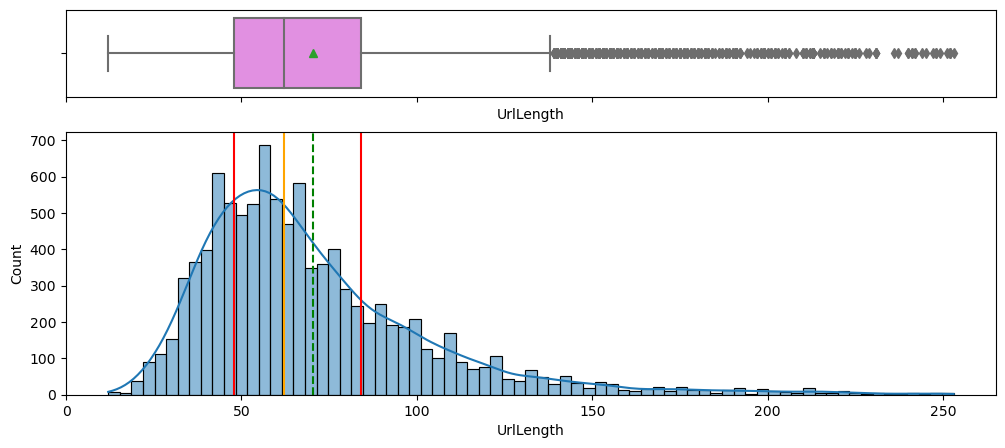

In [358]:
def continuos_univariate_analysis(data, feature, figsize = (12, 5), kde = False):
    f1, (ax_box1, ax_hist1) = plt.subplots(nrows = 2, sharex=True, gridspec_kw={'height_ratios':(0.25, 0.75)}, figsize=figsize)
    sns.color_palette("ocean")
    sns.boxplot(data=data, x=feature, ax=ax_box1, showmeans=True, color='Violet')
    sns.histplot(data=data, x=feature, ax=ax_hist1, kde = kde)
    ax_hist1.axvline(data[feature].mean(), color ='green', linestyle='--')
    ax_hist1.axvline(data[feature].median(), color ='orange', linestyle='-')
    ax_hist1.axvline(np.percentile(dataset['UrlLength'], [25]), color ='red', linestyle='-')
    ax_hist1.axvline(np.percentile(dataset['UrlLength'], [75]), color ='red', linestyle='-')
    q1 = np.percentile(dataset['UrlLength'], [25])

continuos_univariate_analysis(dataset, 'UrlLength', kde = True)

Seperating categorical and continous data

In [359]:
dataset.head()
dataset.drop('id', axis=1, inplace=True)
tagged = []
not_tagged = []
for j in dataset.columns:
    if dataset[j].max() == 1.0 or dataset[j].max() == 1:
        tagged = tagged + [j]
    else:
        not_tagged = not_tagged + [j]

print(len(tagged)+len(not_tagged))

48


Bivariate Analysis on all all continous feature with the CLASS_LABEL

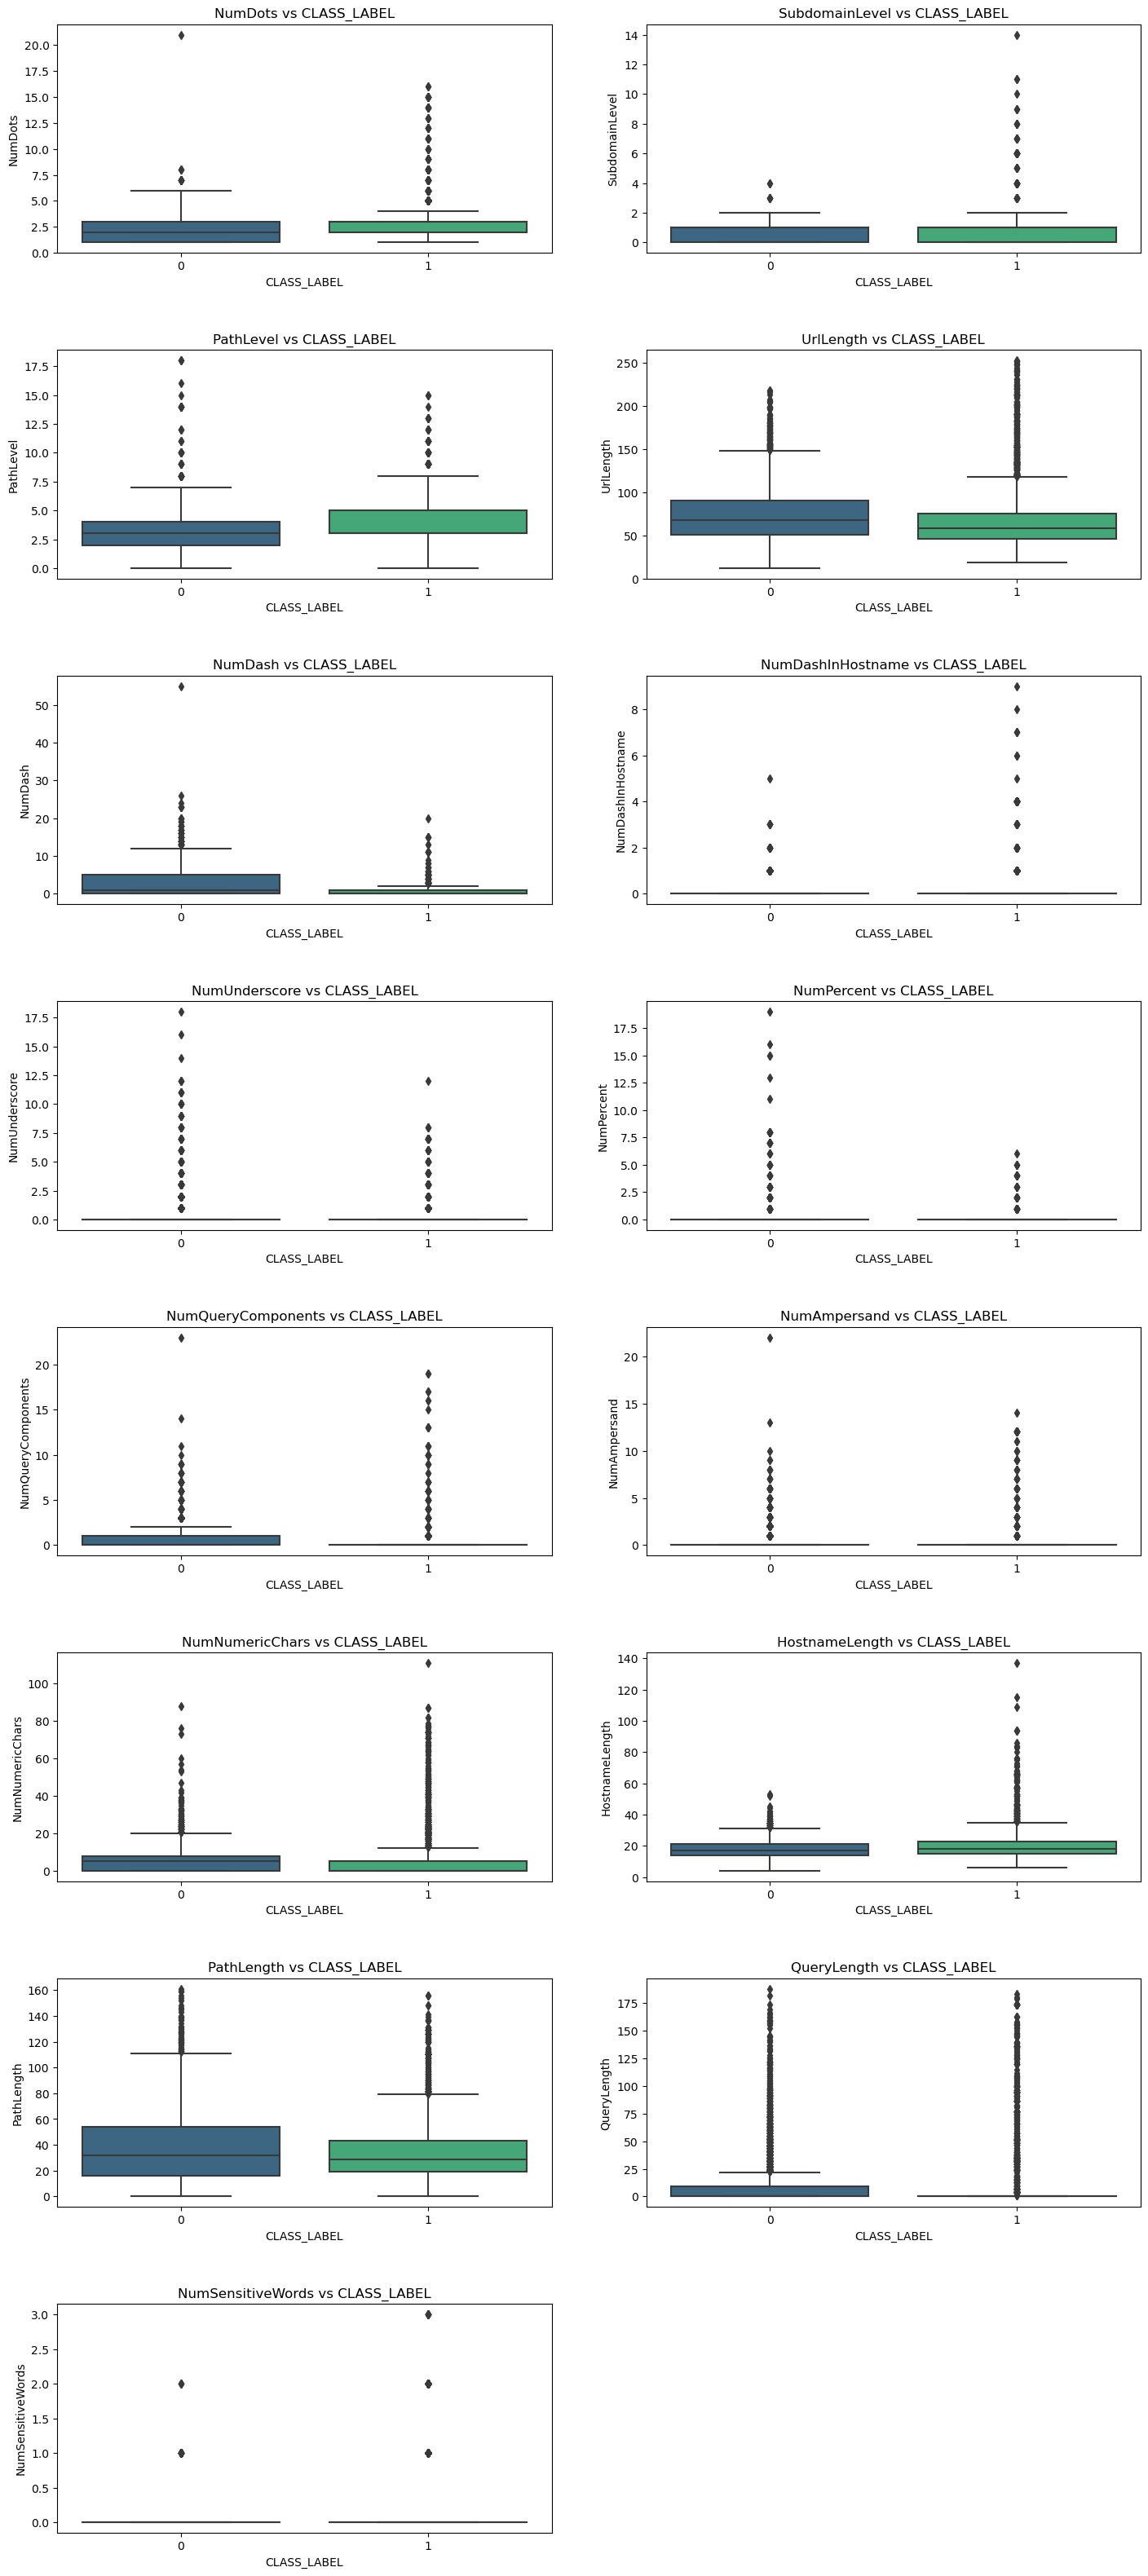

In [360]:
def bivariate_analysis(data, feature_list):
    cols = feature_list
    plt.figure(figsize=(15,100))
    for i, variable in enumerate(cols):
        plt.subplot(25,2, i+1)
        sns.boxplot(data['CLASS_LABEL'], data[variable], palette='viridis')
        plt.tight_layout(pad = 4)
        plt.title(variable + ' vs ' + 'CLASS_LABEL')
    plt.show()

a = dataset.columns.tolist()
bivariate_analysis(dataset, not_tagged)


Correlation Heatmap for all the continuous features

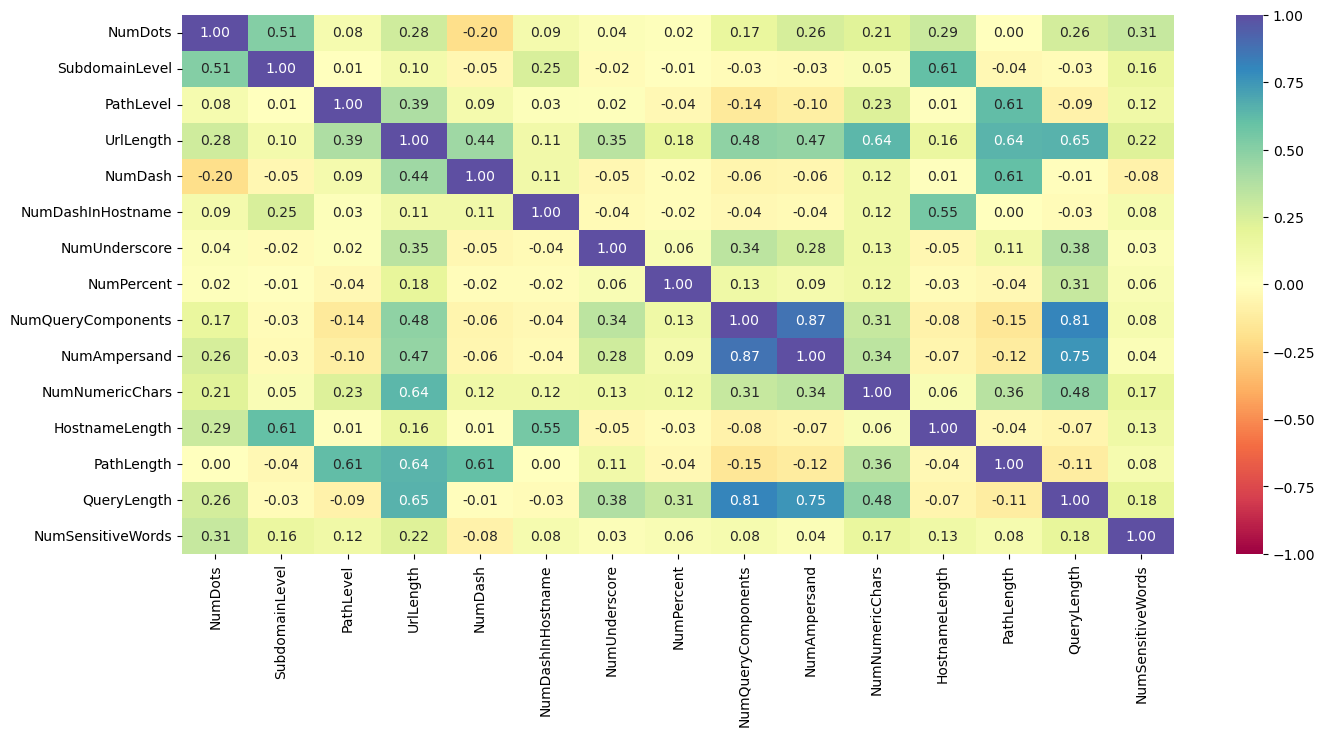

In [361]:
plt.figure(figsize=(16,7))
sns.heatmap(dataset[not_tagged].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap='Spectral')
plt.show()

Analysing how UrlLength corresponds to site validity

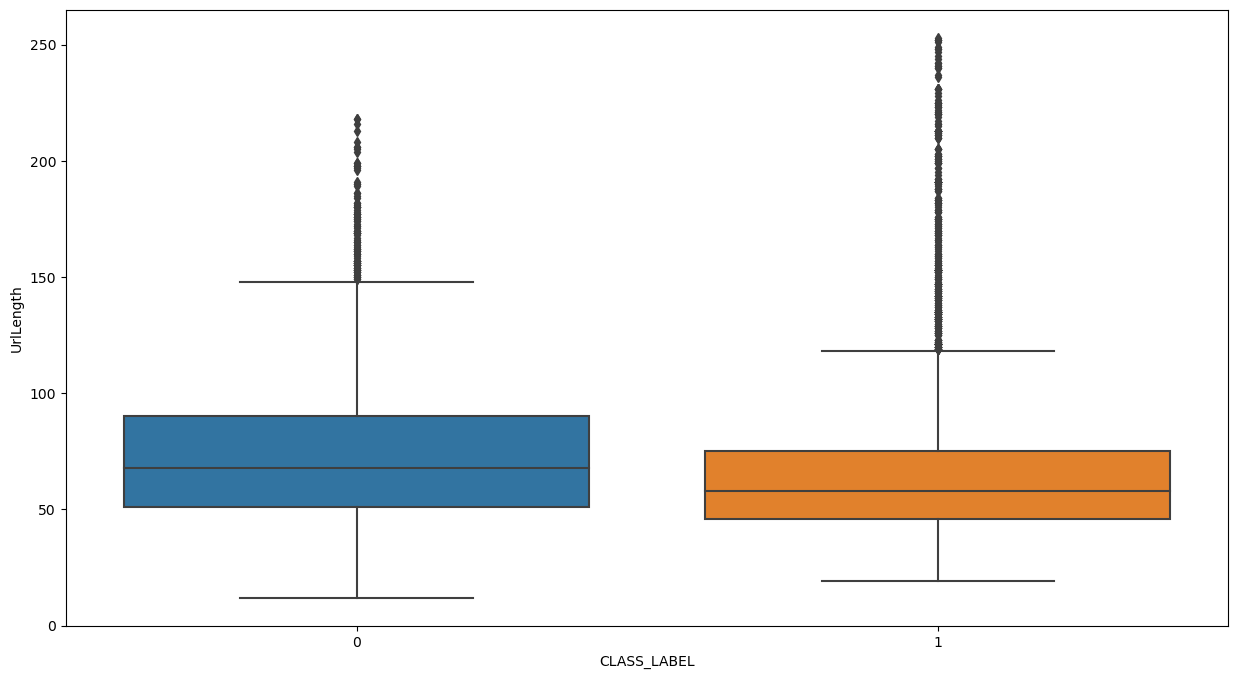

In [362]:
plt.figure(figsize=(15,8))
sns.boxplot(x = "CLASS_LABEL", y = 'UrlLength', data=dataset)
plt.show()

Training the Model without feature selection

In [363]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.3, stratify=y, random_state=1)
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

Testing the model on training data and seeing the performance

In [364]:
y_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(y_pred, Y_train)
score = [f1_score(Y_train, y_pred), precision_score(Y_train, y_pred), recall_score(Y_train, y_pred), accuracy_score(Y_train, y_pred)]
performance = pd.DataFrame([score], columns = ['F1-Score', 'Precision', 'Recall', 'Accuracy']).round(4).mul(100)
performance

,F1-Score,Precision,Recall,Accuracy
0,93.06,92.3,93.83,93.0


Testing the model on test data and seeing the performance

In [365]:
y_pred = model.predict(X_test)
training_data_accuracy = accuracy_score(y_pred, Y_test)
score = [f1_score(Y_test, y_pred), precision_score(Y_test, y_pred), recall_score(Y_test, y_pred), accuracy_score(Y_test, y_pred)]
performance_nofeatureselection = pd.DataFrame([score], columns = ['F1-Score', 'Precision', 'Recall', 'Accuracy']).round(4).mul(100)
performance_nofeatureselection

,F1-Score,Precision,Recall,Accuracy
0,93.88,93.11,94.67,93.83


Applying Feature Selection

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    4.3s finished

[2023-02-23 16:21:11] Features: 1/48 -- score: 0.7336818292131622[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    1.0s finished

[2023-02-23 16:21:12] Features: 2/48 -- score: 0.7764069326477901[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  46 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    1.3s finished

[2023-02-23 16:21:14] Features: 3/48 -- score: 0.8055728789147422[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.3s

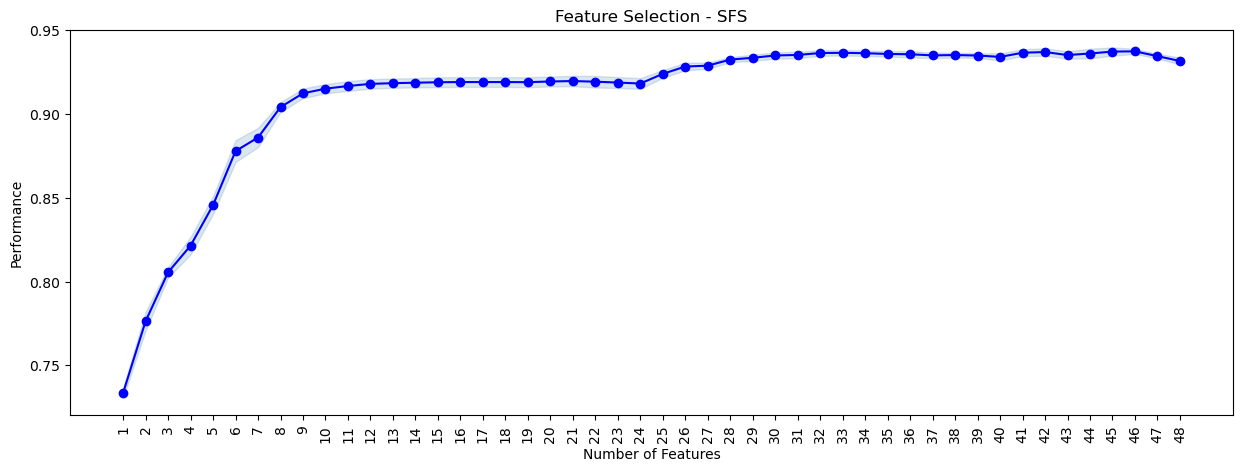

In [366]:
sfs = SFS(model, k_features=X_train.shape[1], forward=True, floating=False, scoring='f1', n_jobs=-1, verbose=2,cv=5)
sfs.fit(X_train, Y_train)
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err', figsize=(15,5))
plt.title("Feature Selection - SFS")
plt.xticks(rotation=90)
plt.show()

We find that upto 30 features only have influence on the performance of the data

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.1s finished

[2023-02-23 16:24:39] Features: 1/30 -- score: 0.7336818292131622[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    1.4s finished

[2023-02-23 16:24:40] Features: 2/30 -- score: 0.7764069326477901[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    3.1s finished

[2023-02-23 16:24:44] Features: 3/30 -- score: 0.8055728789147422[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.4s finished

[2023-02-23 16:24:46] Features: 4/30 -- score: 0.8214788726612966[Parallel(n_jobs=-1)]: U

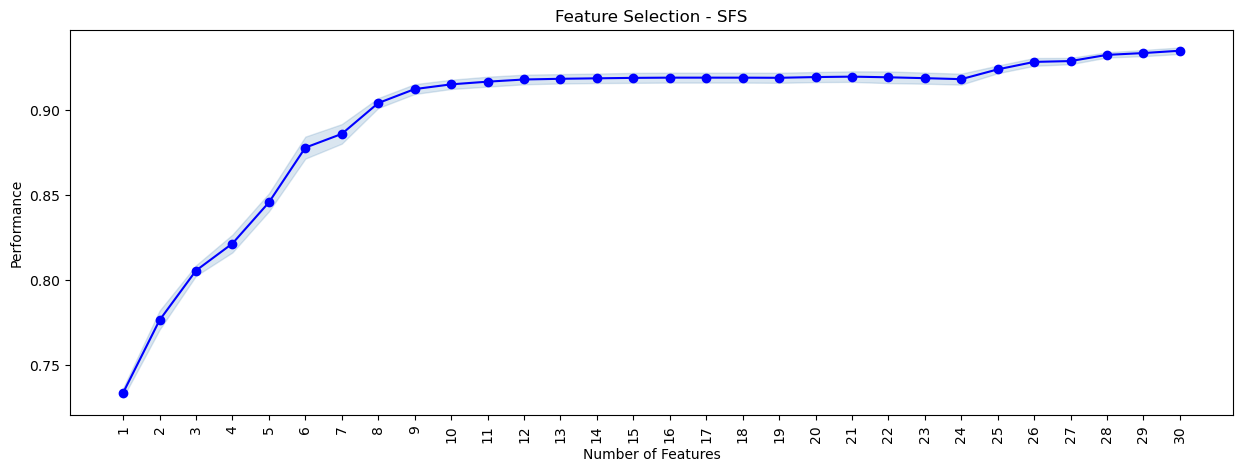

[2, 4, 5, 6, 7, 11, 12, 14, 16, 17, 18, 19, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 42, 47]
Index(['PathLevel', 'NumDash', 'NumDashInHostname', 'AtSymbol', 'TildeSymbol',
       'NumAmpersand', 'NumHash', 'NoHttps', 'IpAddress', 'DomainInSubdomains',
       'DomainInPaths', 'HttpsInHostname', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms', 'ExtFormAction',
       'AbnormalFormAction', 'PctNullSelfRedirectHyperlinks',
       'FrequentDomainNameMismatch', 'FakeLinkInStatusBar',
       'RightClickDisabled', 'PopUpWindow', 'SubmitInfoToEmail',
       'IframeOrFrame', 'SubdomainLevelRT',
       'PctExtNullSelfRedirectHyperlinksRT'],
      dtype='object')


In [367]:
sfs = SFS(model, k_features=30, forward=True, floating=False, scoring='f1', n_jobs=-1, verbose=2,cv=5)
sfs.fit(X_train, Y_train)
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err', figsize=(15,5))
plt.title("Feature Selection - SFS")
plt.xticks(rotation=90)
plt.show()
feature_indx = list(sfs.k_feature_idx_)
print(feature_indx) #Returns the columns indicies
print(X_train.columns[feature_indx])

Using the optimised dataset

In [368]:
X_train_transformed = X_train[X_train.columns[feature_indx]]
X_test_transformed = X_test[X_train_transformed.columns]

Making the model on the optimised datset

In [369]:
model = LogisticRegression()
model.fit(X_train_transformed, Y_train)

LogisticRegression()

Testing the models performance on training set

In [370]:
y_pred = model.predict(X_train_transformed)
training_data_accuracy = accuracy_score(y_pred, Y_train)
score = [f1_score(Y_train, y_pred), precision_score(Y_train, y_pred), recall_score(Y_train, y_pred), accuracy_score(Y_train, y_pred)]
performance = pd.DataFrame([score], columns = ['F1-Score', 'Precision', 'Recall', 'Accuracy']).round(4).mul(100)
performance

,F1-Score,Precision,Recall,Accuracy
0,93.62,92.38,94.89,93.53


Testing the models performance on testing set

In [371]:
y_pred = model.predict(X_test_transformed)
Y_train = Y_test
training_data_accuracy = accuracy_score(y_pred, Y_train)
score = [f1_score(Y_train, y_pred), precision_score(Y_train, y_pred), recall_score(Y_train, y_pred), accuracy_score(Y_train, y_pred)]
performance = pd.DataFrame([score], columns = ['F1-Score', 'Precision', 'Recall', 'Accuracy']).round(4).mul(100)
performance

,F1-Score,Precision,Recall,Accuracy
0,93.75,92.53,95.0,93.67


Hence the model can predict the data upto 93.75% of times